In [1]:
import scienceplots
import matplotlib.pyplot as plt
import numpy as np
from lmfit import Model
import os
import sys

sys.path.append("../..")

from blume.process import read, compute, plot_file, exact_m
from blume.run import Results, ModelParameters
from blume.model.post_props import Prop

plt.style.use("science")
plt.rcParams["text.usetex"] = True

T_c = 2 / np.log(1 + np.sqrt(2))


In [15]:
sizes = [8, 18, 38, 88]
result = Results(varying_param= "max_steps", range=sizes)
params = ModelParameters(var_range=(1.5, 2.8), step=0.001, tol=1e-10, use_prev=True, chi=24, b_c =True)
result.get(params, sweeping_param="temperature")

max_steps=8: 100%|██████████| 1300/1300 [00:12<00:00, 101.98it/s]


Saving data in folder: '05-06 16:12'
Done 



max_steps=18: 100%|██████████| 1300/1300 [00:35<00:00, 36.84it/s]


Saving data in folder: '05-06 16:12'
Done 



max_steps=38: 100%|██████████| 1300/1300 [01:20<00:00, 16.19it/s]


Saving data in folder: '05-06 16:12'
Done 



max_steps=88: 100%|██████████| 1300/1300 [02:37<00:00,  8.25it/s]


Saving data in folder: '05-06 16:12'
Done 



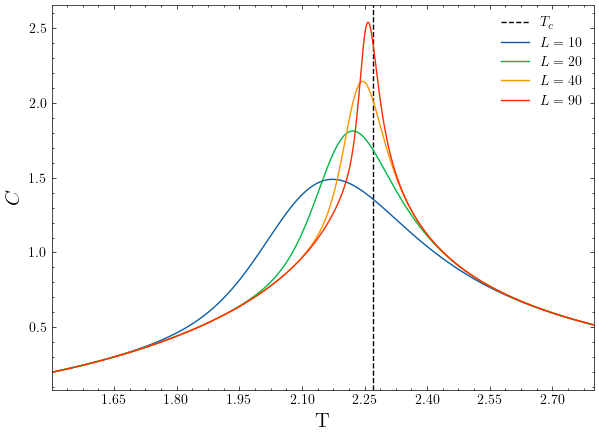

In [18]:
from matplotlib.ticker import FormatStrFormatter, MaxNLocator

sizes = [8, 18, 38, 88]

plt.figure(figsize=(7, 5))
plt.axvline(T_c, color="k", linestyle="dashed", label=r"$T_c$")

for size in sizes:
    data = read("05-06 16:12", f"max_steps{size}")
    energies = compute(Prop.Es, data)
    temps = data["temperatures"]
    heats = np.diff(energies) / np.diff(temps)
    plt.plot(temps[:-1], heats, label=f"$L={size+2}$")
    
plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.xlim(1.5, 2.8)
plt.legend()
plt.ylabel(r"$C$", fontsize=15)
plt.xlabel(r"T", fontsize=15)
plt.show()